In [12]:
import scipy
import statsmodels
import sklearn
import theano
import tensorflow
import keras

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
#read history data used to train model
dataset = pd.read_excel('E:/SUMO/RUIXIAO/newChattanooganet/Data/output/Porcessed_BYD751_dataset.xlsm', index_col=False)
print(dataset.head(5))
dataset['Speed2'] = dataset['Speed'].pow(2)
dataset['Speed3'] = dataset['Speed'].pow(3)
dataset['AccSpeed'] = dataset['Acc'] * dataset['Speed']
dataset['PowIndex'] = 1
neg_pow = dataset['Pow'] < 0
dataset.loc[neg_pow,'PowIndex'] = 0

   Unnamed: 0     Acc     Pow     Speed    RPM  Elevation    Temp  Humidity  \
0           0  0.0420  3.3925  0.000000   20.0    670.420  55.735     0.965   
1           1  0.0630  4.0610  0.207000   30.0    670.420  55.735     0.965   
2           2  0.0840  5.4480  0.414000   40.0    670.428  55.735     0.965   
3           3  0.5435  7.2475  0.828333  150.0    670.504  55.735     0.965   
4           4  0.5870  8.4300  1.035667  181.0    670.504  55.735     0.965   

      Grade  
0  0.000000  
1  0.017567  
2  0.000000  
3  0.000000  
4 -0.032914  


In [4]:
#Split train and test data and partition data by vehicle status
train = dataset.sample(n=math.floor(0.8*dataset.shape[0]))
test = dataset.sample(n=math.ceil(0.2*dataset.shape[0]))

train_accInd = train['Acc'] > 2
train_decInd = train['Acc'] < -2
train_crzInd = (train['Acc'] <= 2) & (train['Acc'] >= -2)
train_acc = train[train_accInd]
train_dec = train[train_decInd]
train_crz = train[train_crzInd]
print("# of acceleration samples for training: ", train_acc.shape[0])
print("# of decelearation samples for training: ", train_dec.shape[0])
print("# of cruizing samples for training: ", train_crz.shape[0])

test_accInd = test['Acc'] > 2
test_decInd = test['Acc'] < -2
test_crzInd = (test['Acc'] <= 2) & (test['Acc'] >= -2)
test_acc = test[test_accInd]
test_dec = test[test_decInd]
test_crz = test[test_crzInd]
print("# of acceleration samples for testing: ", test_acc.shape[0])
print("# of decelearation samples for testing: ", test_dec.shape[0])
print("# of cruizing samples for testing: ", test_crz.shape[0])

# of acceleration samples for training:  25627
# of decelearation samples for training:  28261
# of cruizing samples for training:  212008
# of acceleration samples for testing:  6365
# of decelearation samples for testing:  7000
# of cruizing samples for testing:  53110


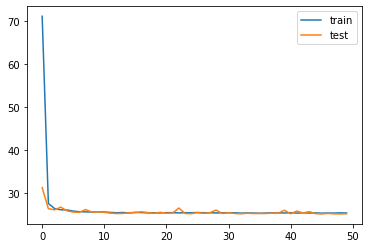

In [5]:
#Construct and compile models, using Mean Absolute Error for regression prediction models, Cross-entropy for power sign prediction model
#Fit each model seperately, each with 100 epochs and batch size is 32      
### Model for accelerating status
Y_train_acc = train_acc['Pow']
X_train_acc = train_acc[['Acc','Speed','Speed2','Speed3','AccSpeed']]

Y_test_acc = test_acc['Pow']
X_test_acc = test_acc[['Acc','Speed','Speed2','Speed3','AccSpeed']]

model_acc = Sequential()
model_acc.add(Dense(10,kernel_initializer='normal', input_dim=5, activation ='relu'))
model_acc.add(Dense(5, kernel_initializer='normal', activation ='relu'))
model_acc.add(Dense(3, kernel_initializer='normal', activation ='relu'))
model_acc.add(Dense(1,kernel_initializer='normal', activation ='linear'))

model_acc.compile(loss='mean_absolute_error', optimizer='adam')

history = model_acc.fit(X_train_acc, Y_train_acc, validation_data=(X_test_acc, Y_test_acc), epochs=50, batch_size=32, verbose = 0)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


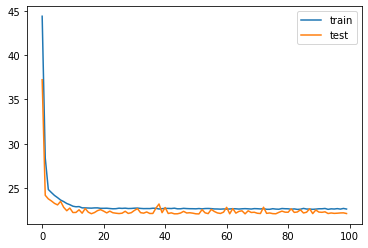

In [6]:
### Model for decelerating status
Y_train_dec = train_dec['Pow']
X_train_dec = train_dec[['Acc','Speed','Speed2','Speed3','AccSpeed']]

Y_test_dec = test_dec['Pow']
X_test_dec = test_dec[['Acc','Speed','Speed2','Speed3','AccSpeed']]

model_dec = Sequential()
model_dec.add(Dense(10,kernel_initializer='normal', input_dim=5, activation ='relu'))
model_dec.add(Dense(5, kernel_initializer='normal', activation ='relu'))
model_dec.add(Dense(3, kernel_initializer='normal', activation ='relu'))
model_dec.add(Dense(1,kernel_initializer='normal', activation ='linear'))

model_dec.compile(loss='mean_absolute_error', optimizer='adam')

history = model_dec.fit(X_train_dec, Y_train_dec, validation_data=(X_test_dec, Y_test_dec), epochs=100, batch_size=32, verbose = 0)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

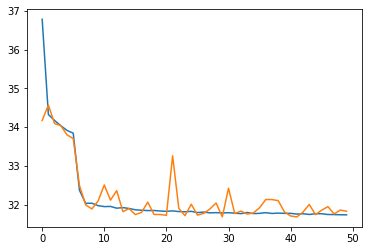

In [7]:
### Cruizing model
Y_train_crz = train_crz['Pow']
X_train_crz = train_crz[['Acc','Speed','Speed2','Speed3','AccSpeed']]

Y_test_crz = test_crz['Pow']
X_test_crz = test_crz[['Acc','Speed','Speed2','Speed3','AccSpeed']]

model_crz = Sequential()
model_crz.add(Dense(10,kernel_initializer='normal', input_dim=5, activation ='relu'))
model_crz.add(Dense(5, kernel_initializer='normal', activation ='relu'))
model_crz.add(Dense(3, kernel_initializer='normal', activation ='relu'))
model_crz.add(Dense(1,kernel_initializer='normal', activation ='linear'))

model_crz.compile(loss='mean_absolute_error', optimizer='adam')

history = model_crz.fit(X_train_crz, Y_train_crz, validation_data=(X_test_crz, Y_test_crz), epochs=50, batch_size=32, verbose = 0)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

In [46]:
#read trajectory data that needs prediction
trip = pd.read_csv("E:/SUMO/RUIXIAO/newChattanooganet/Data/output/Traj6-7/Route1_trip151720020_061000.csv")
trip1=trip[['speed','acceleration']]
input4pre=pd.DataFrame()  
input4pre['Acc']=trip1['acceleration']*(0.001)*3.28
#ft/s2
input4pre['Speed']=trip1['speed']*(0.01*3.6) *0.621371
#mph
input4pre['Speed2'] = input4pre['Speed'].pow(2)
input4pre['Speed3'] = input4pre['Speed'].pow(3)
input4pre['AccSpeed'] = input4pre['Acc'] * input4pre['Speed']
input4pre=input4pre[['Acc','Speed','Speed2','Speed3','AccSpeed']]
print(input4pre.columns)

Index(['Acc', 'Speed', 'Speed2', 'Speed3', 'AccSpeed'], dtype='object')


In [48]:
#partition data
pre_accIdx = input4pre['Acc'] > 2
pre_decIdx = input4pre['Acc'] < -2
pre_crzIdx = (input4pre['Acc'] <= 2) & (input4pre['Acc'] >= -2)
pre_acc = input4pre[pre_accIdx]
pre_dec = input4pre[pre_decIdx]
pre_crz = input4pre[pre_crzIdx]

In [49]:
#prediction
pow_acc = model_acc.predict(pre_acc)
pow_dec = model_dec.predict(pre_dec)
pow_crz = model_crz.predict(pre_crz)
trip_acc = trip[pre_accIdx]
trip_dec = trip[pre_decIdx]
trip_crz = trip[pre_crzIdx]
trip_acc = trip_acc.reset_index(drop=True)
trip_dec = trip_dec.reset_index(drop=True)
trip_crz = trip_crz.reset_index(drop=True)
trip_accP = pd.concat([trip_acc,pd.DataFrame(pow_acc,columns=['Power'])], axis=1)
trip_decP = pd.concat([trip_dec,pd.DataFrame(pow_dec,columns=['Power'])], axis=1)
trip_crzP = pd.concat([trip_crz,pd.DataFrame(pow_crz,columns=['Power'])], axis=1)
tripfinal = pd.concat([trip_accP,trip_decP,trip_crzP])
tripfinal = tripfinal.sort_values(by=['time'])
tripfinal = tripfinal.reset_index(drop=True)


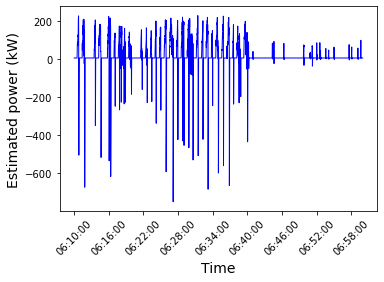

In [50]:
#plot results
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(tripfinal.index, tripfinal.Power, color='blue', linewidth=1)
ax1.set_xticks(tripfinal.index[::360])
ax1.set_xticklabels(tripfinal.time[::360], rotation=45)
plt.tight_layout(pad=4)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Estimated power (kW)",fontsize = 14)
plt.show()